**Step 1: Exploratory Data Analysis (EDA)**

In [4]:
#Load and Inspect the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('airbnb.csv')  # Update with your file path

# Display basic info
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (12805, 23)

Data Types:
 Unnamed: 0        int64
id                int64
name             object
rating           object
reviews          object
host_name        object
host_id         float64
address          object
features         object
amenities        object
safety_rules     object
hourse_rules     object
img_links        object
price             int64
country          object
bathrooms         int64
beds              int64
guests            int64
toiles            int64
bedrooms          int64
studios           int64
checkin          object
checkout         object
dtype: object

First 5 Rows:
    Unnamed: 0        id                                               name  \
0           0  49849504                                     Perla bungalov   
1           1  50891766  Authentic Beach Architect Sheltered Villa with...   
2           2  50699164                                  cottages sataplia   
3           3  49871422                        Sapanca Breathable

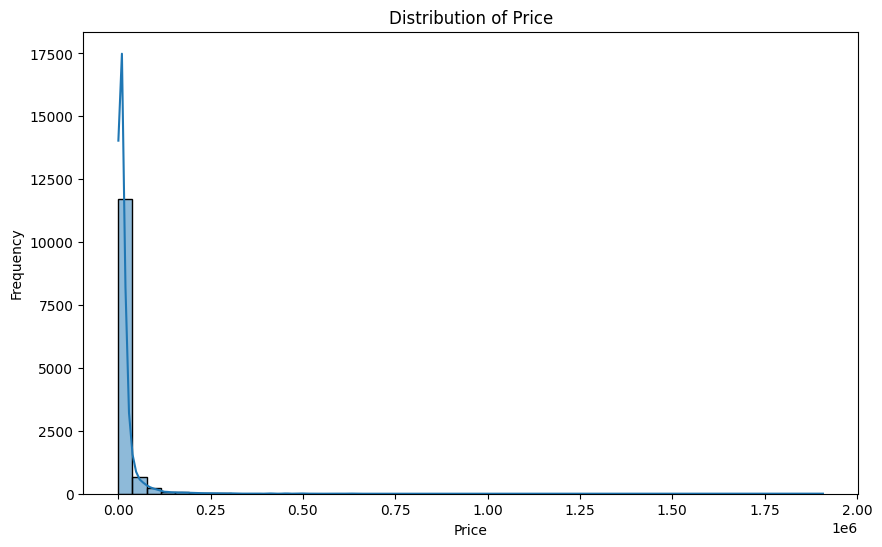

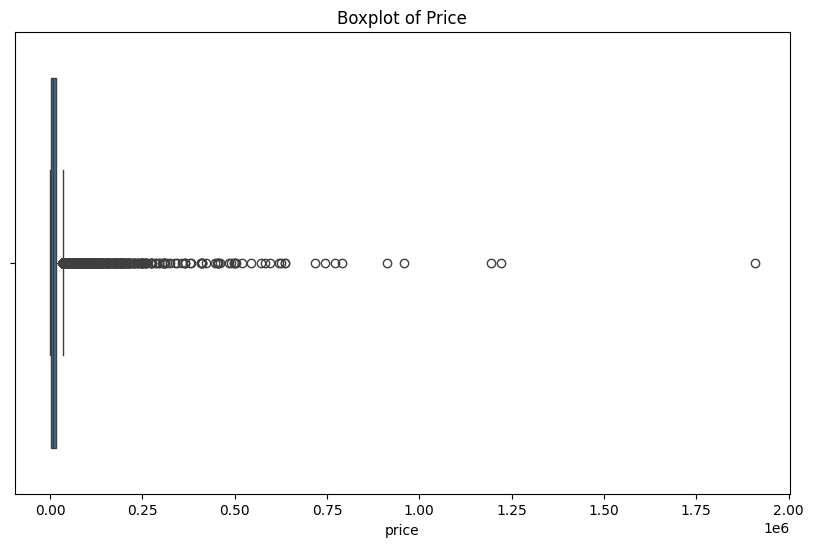

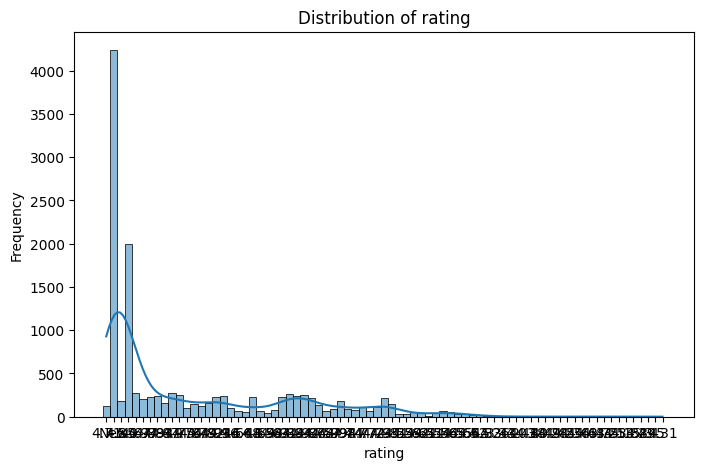

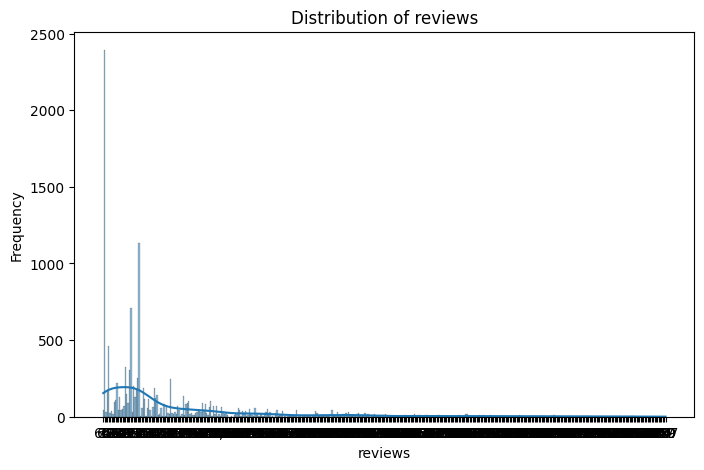

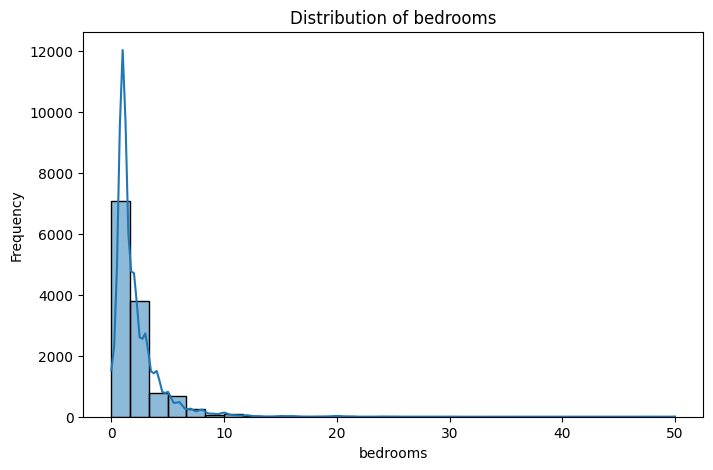

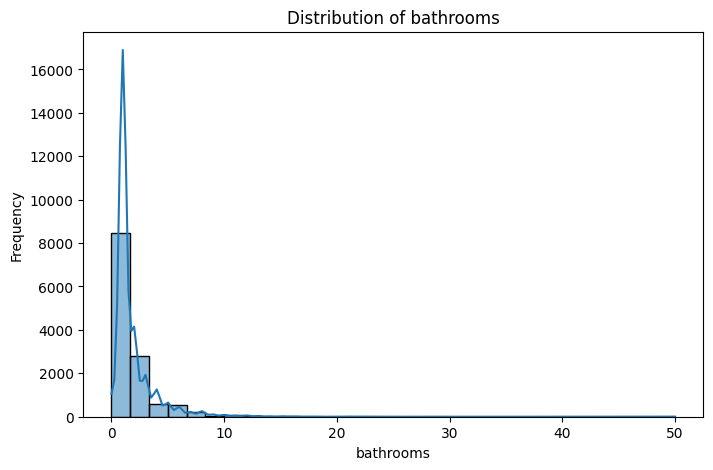

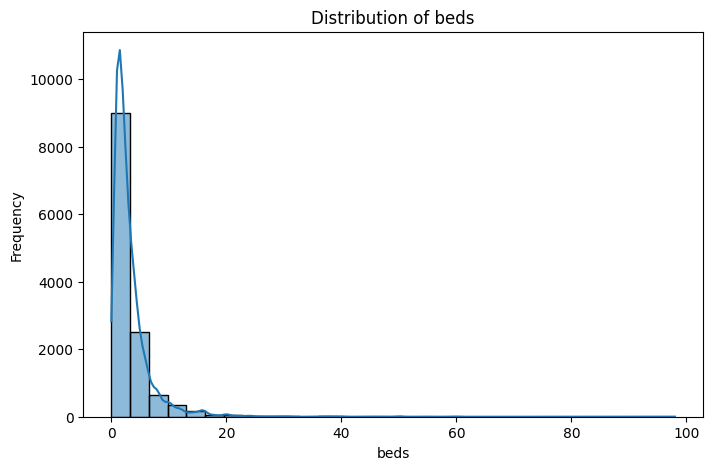

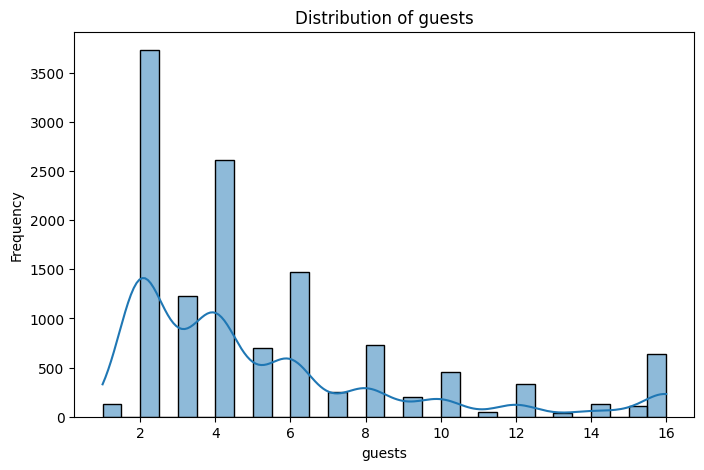

In [5]:
#Check Data Distribution
# Plot distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for price to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

# Distribution of other numerical features
numerical_cols = ['rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-21-30ff2d9c7b3e>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].median(), inplace=True)
<ipython-input-21-30ff2d9c7b3e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

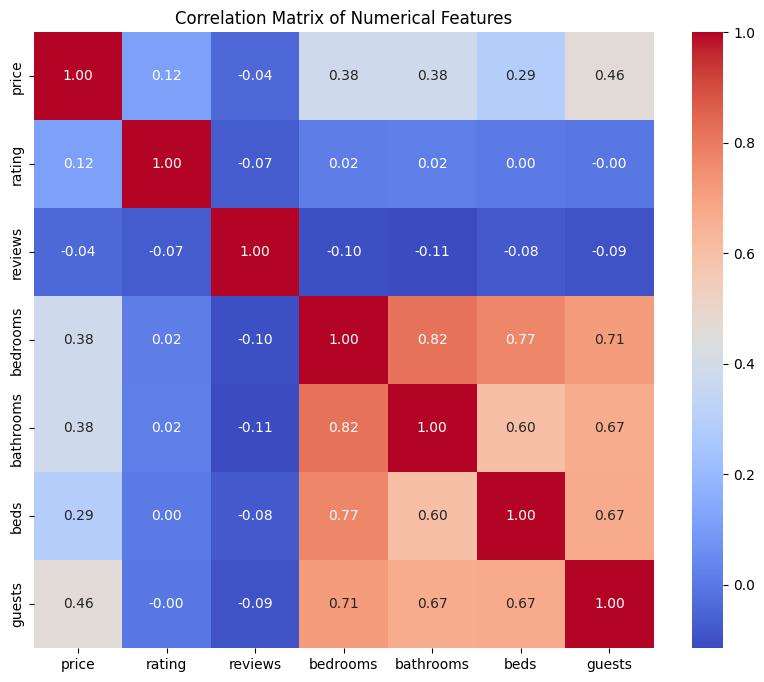

In [21]:
#Correlation Analysis



# Select numerical columns for correlation
numerical_cols = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']

# Convert 'rating' and 'reviews' to numerical, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Impute missing values
df['rating'].fillna(df['rating'].median(), inplace=True)
df['reviews'].fillna(0, inplace=True)
df['reviews'] = df['reviews'].astype(int)

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

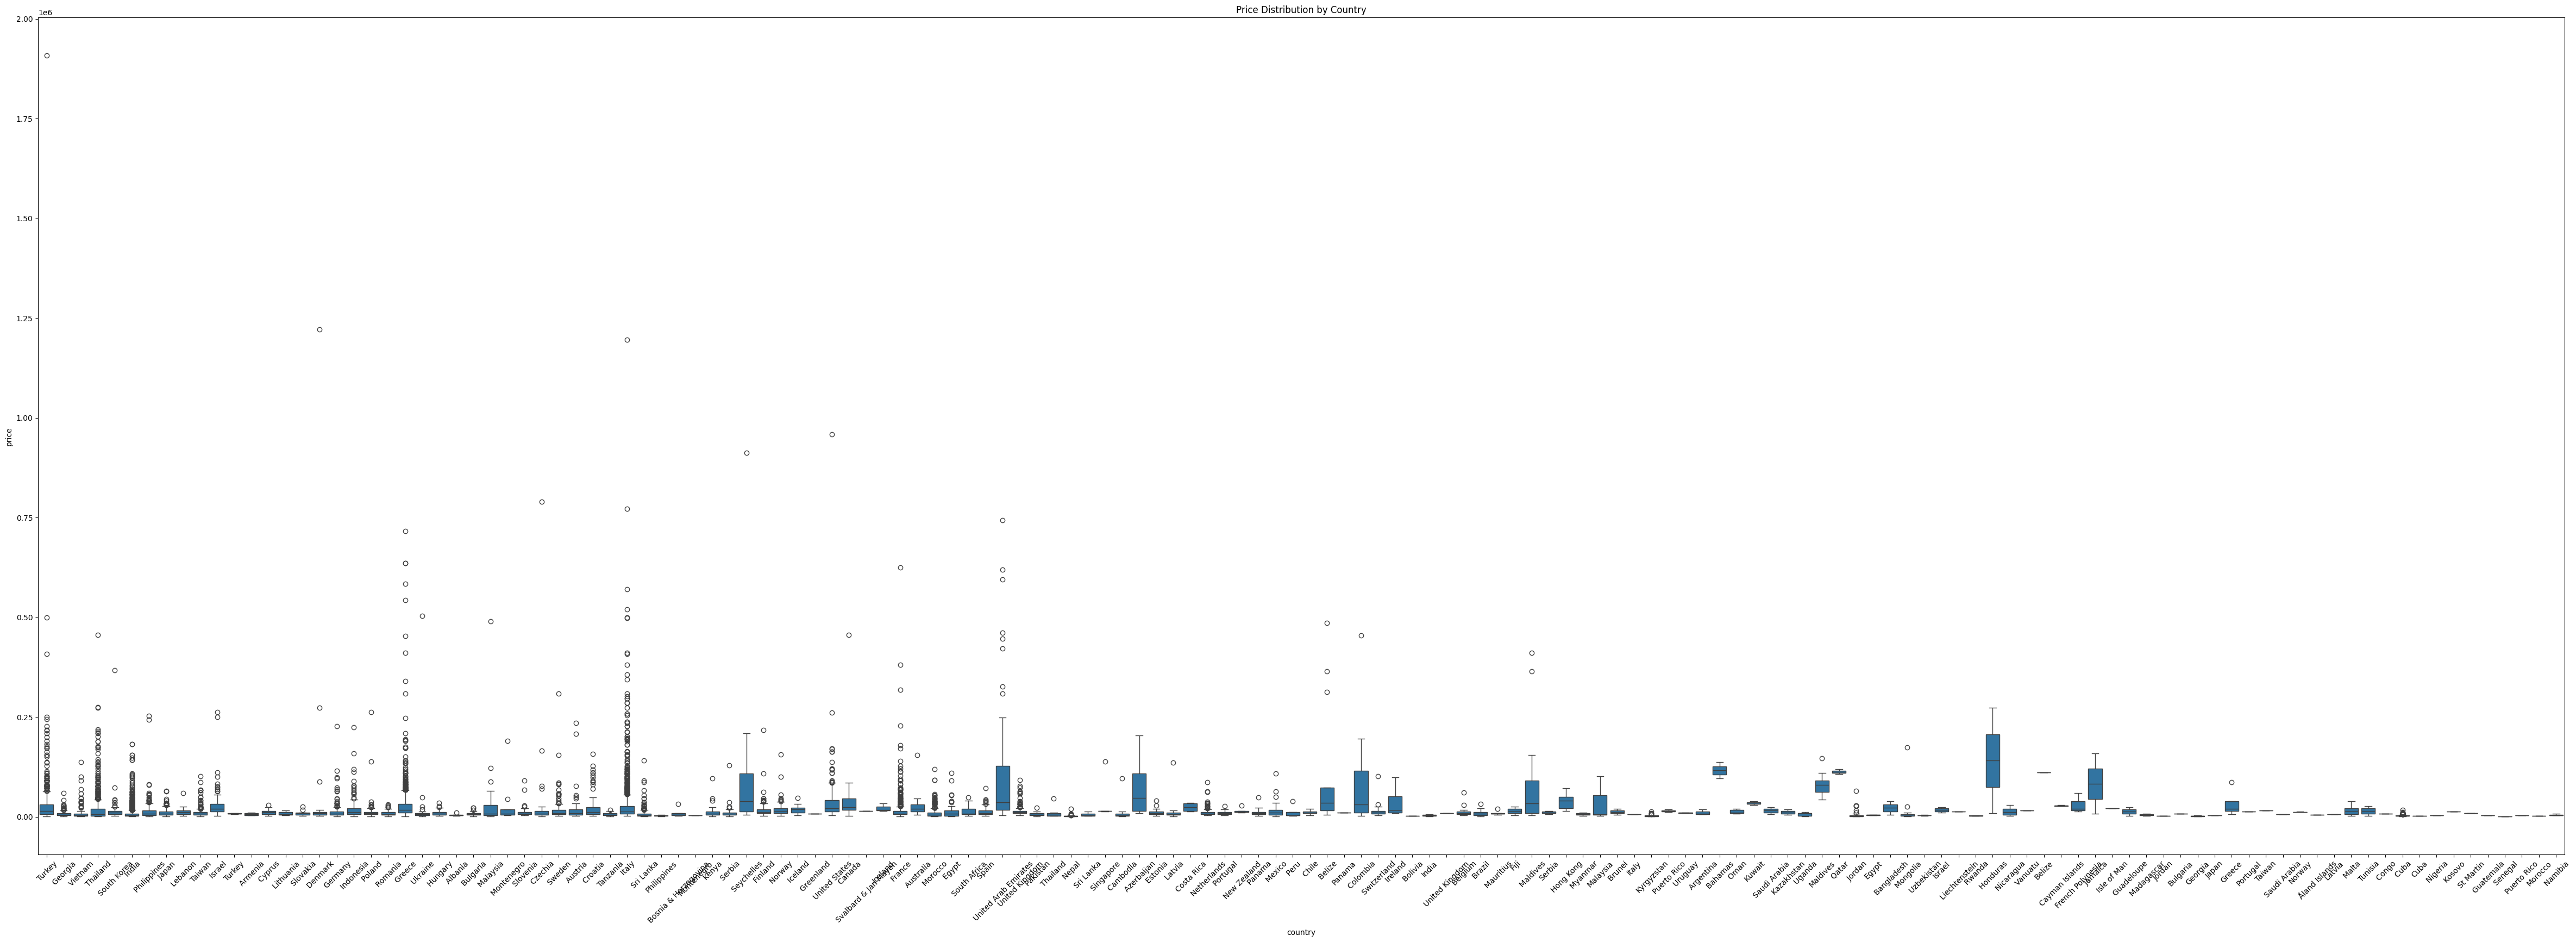

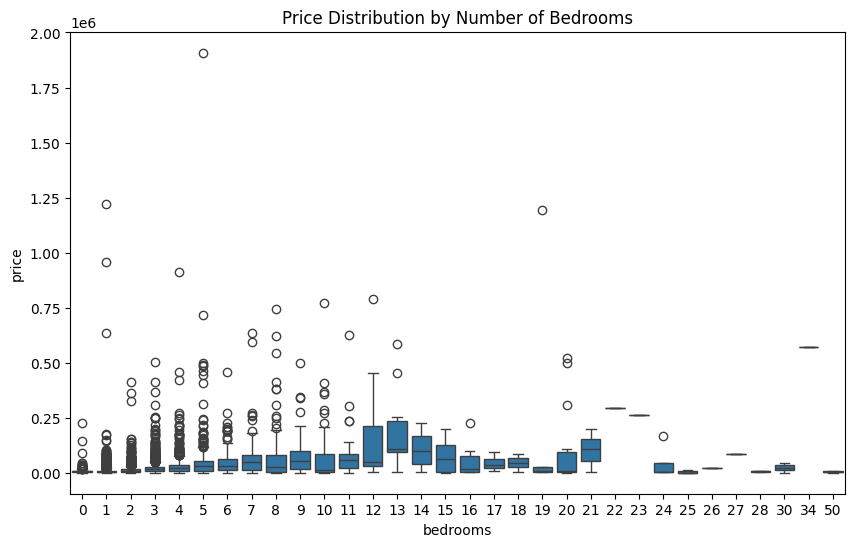

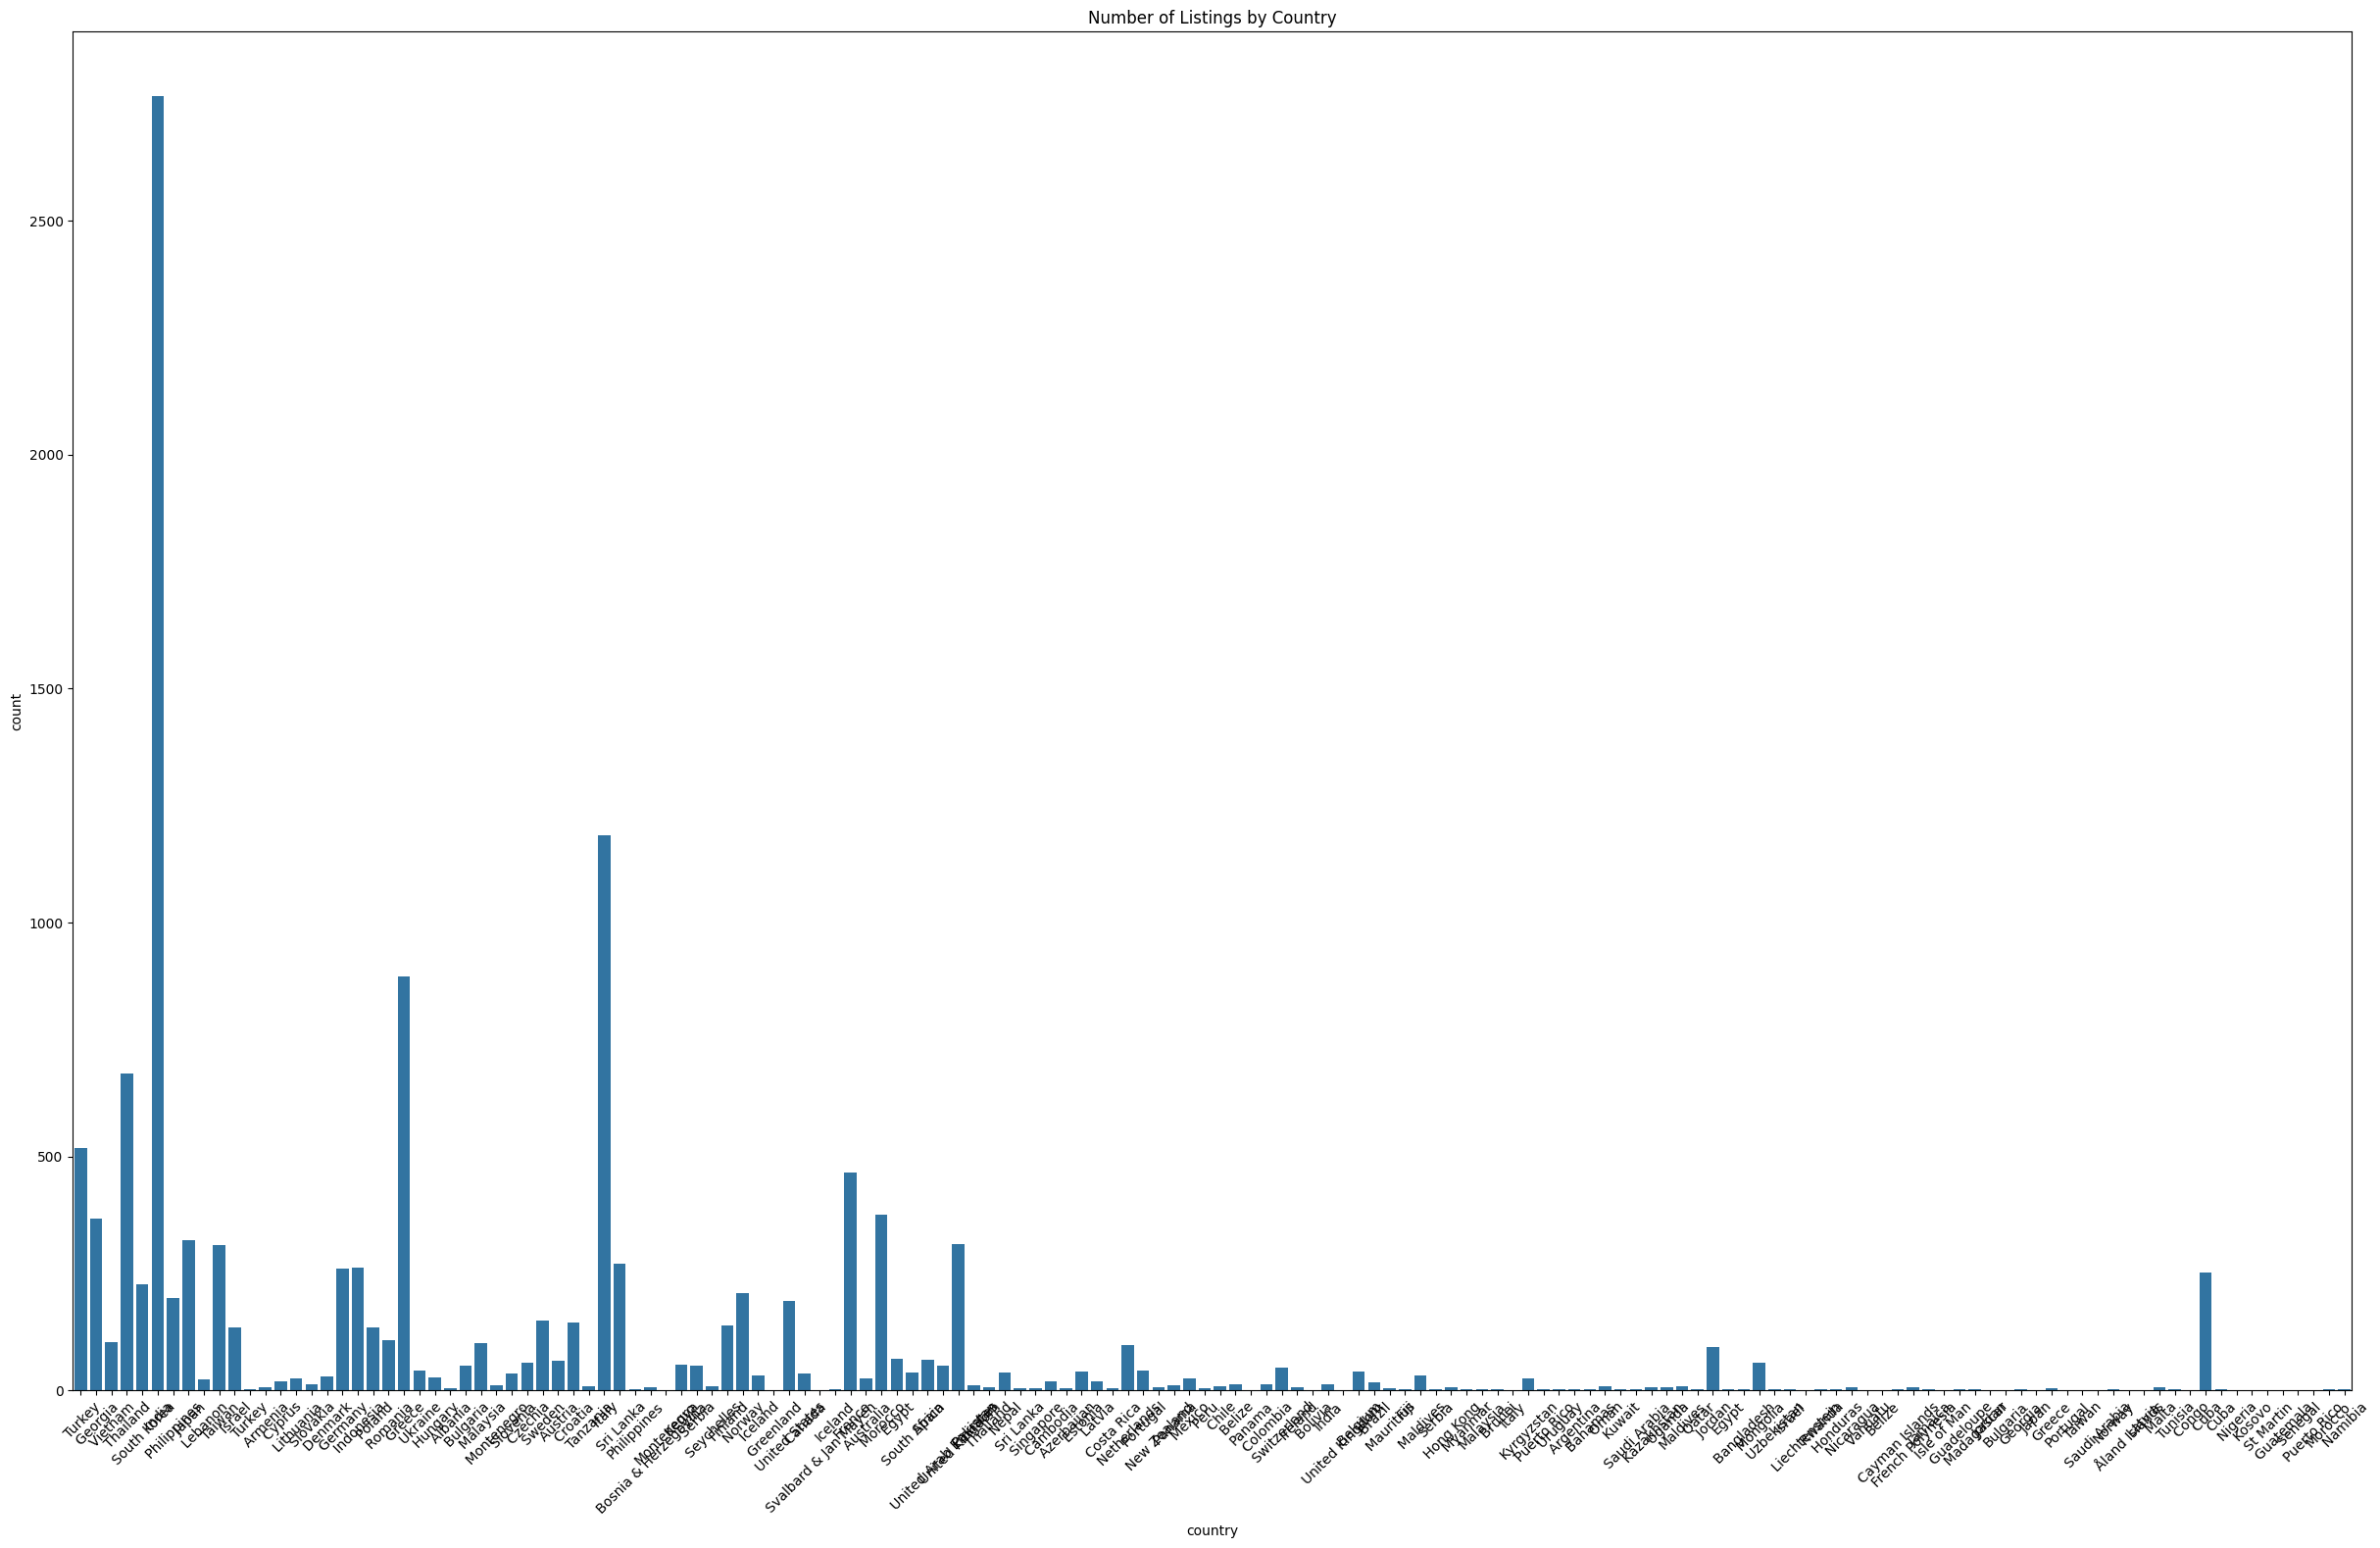

In [15]:
#Analyze Categorical Features

# Boxplot of price by country
plt.figure(figsize=(60, 20))
sns.boxplot(x='country', y='price', data=df)
plt.title('Price Distribution by Country')
plt.xticks(rotation=45)
plt.show()

# Boxplot of price by bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

# Count of listings by country
plt.figure(figsize=(30, 18))
sns.countplot(x='country', data=df)
plt.title('Number of Listings by Country')
plt.xticks(rotation=45)
plt.show()

**Step 2: Data Cleaning**


In [16]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing numerical values with median
numerical_cols = ['price', 'rating', 'reviews', 'bedrooms', 'bathrooms', 'beds', 'guests']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
categorical_cols = ['country', 'host_name', 'address']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print("\nMissing Values After Imputation:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          8
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64

Missing Values After Imputation:
 Unnamed: 0         0
id                 0
name               0
rating             0
reviews            0
host_name          0
host_id            0
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
img_links          0
price              0
country            0
bathrooms          0
beds               0
guests             0
toiles             0
bedrooms           0
studios            0
checkin    

<ipython-input-16-786b82f214d6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-16-786b82f214d6>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

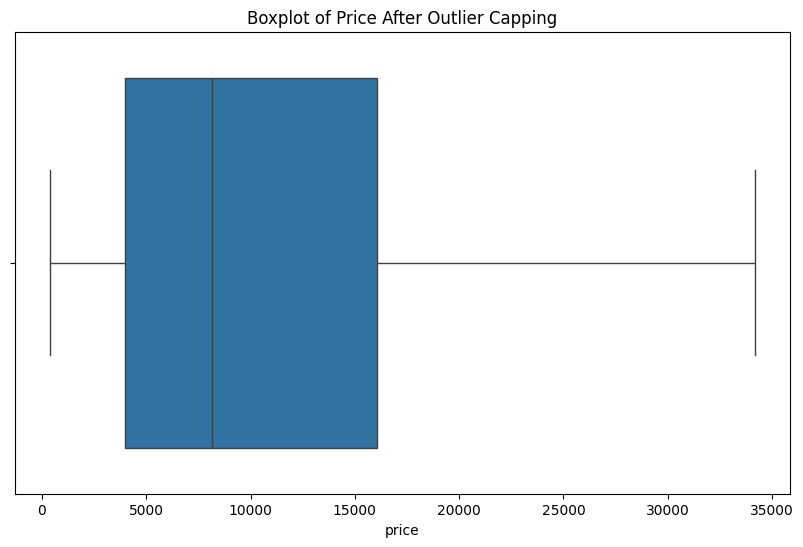

In [17]:
# Detect outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

# Verify with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price After Outlier Capping')
plt.show()

In [18]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['country', 'bedrooms'], drop_first=True)

# Drop high-cardinality columns
df_encoded = df_encoded.drop(['host_name', 'name', 'address', 'amenities', 'checkin', 'checkout'], axis=1)

# Display encoded dataset
print("Encoded Dataset Shape:", df_encoded.shape)
print("\nFirst 5 Rows:\n", df_encoded.head())

Encoded Dataset Shape: (12805, 193)

First 5 Rows:
    Unnamed: 0        id  rating  reviews      host_id  \
0           0  49849504    4.71       64  357334205.0   
1           1  50891766    4.89        0  386223873.0   
2           2  50699164    4.85       68  409690853.0   
3           3  49871422    5.00       13  401873242.0   
4           4  51245886    4.89        0  414884116.0   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   

                                        safety_rules  \
0  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
1  󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...   
2  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
3  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
4  󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...  

In [23]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns for scaling (exclude 'bedrooms' since it was one-hot encoded)
numerical_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'studios']

# Verify that all columns exist in df_encoded
missing_cols = [col for col in numerical_cols if col not in df_encoded.columns]
if missing_cols:
    print(f"Warning: These columns are missing in df_encoded: {missing_cols}")
else:
    print("All numerical columns are present in df_encoded.")

# Initialize scaler
scaler = StandardScaler()

# Scale numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display scaled data
print("\nFirst 5 Rows After Scaling:\n", df_encoded.head())

All numerical columns are present in df_encoded.

First 5 Rows After Scaling:
    Unnamed: 0        id    rating   reviews      host_id  \
0           0  49849504 -1.362083  0.426401  357334205.0   
1           1  50891766  0.187306 -0.550382  386223873.0   
2           2  50699164 -0.157003  0.487450  409690853.0   
3           3  49871422  1.134155 -0.351973  401873242.0   
4           4  51245886  0.187306 -0.550382  414884116.0   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   

                                        safety_rules  \
0  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
1  󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...   
2  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
3  󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...   
4  󹀁,Airb

**Step 3: Model Creation**



In [27]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Define features (X) and target (y)
# Drop irrelevant columns and the target 'price'
X = df_encoded.drop(['price', 'id', 'host_id', 'name', 'address', 'features', 'amenities',
                    'safety_rules', 'hourse_rules', 'img_links', 'checkin', 'checkout',
                    'Unnamed: 0'], axis=1, errors='ignore')
y = df_encoded['price']

# Split data into 80-20 train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)
print("\nFeatures in X_train:\n", X_train.columns.tolist())

X_train Shape: (10244, 185)
X_test Shape: (2561, 185)
y_train Shape: (10244,)
y_test Shape: (2561,)

Features in X_train:
 ['rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toiles', 'studios', 'country_ Argentina', 'country_ Armenia', 'country_ Australia', 'country_ Austria', 'country_ Azerbaijan', 'country_ Bahamas', 'country_ Bangladesh', 'country_ Belgium', 'country_ Belize', 'country_ Bolivia', 'country_ Bosnia & Herzegovina', 'country_ Brazil', 'country_ Brunei', 'country_ Bulgaria', 'country_ Cambodia', 'country_ Canada', 'country_ Cayman Islands', 'country_ Chile', 'country_ Colombia', 'country_ Congo', 'country_ Costa Rica', 'country_ Croatia', 'country_ Cuba', 'country_ Cyprus', 'country_ Czechia', 'country_ Denmark', 'country_ Egypt', 'country_ Estonia', 'country_ Fiji', 'country_ Finland', 'country_ France', 'country_ French Polynesia', 'country_ Georgia', 'country_ Germany', 'country_ Greece', 'country_ Greenland', 'country_ Guadeloupe', 'country_ Guatemala', 'country_ 

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


321/321 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 233565008.0000 - mae: 11436.7490 - val_loss: 107383896.0000 - val_mae: 7160.3481
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 89409688.0000 - mae: 6928.1147 - val_loss: 74125184.0000 - val_mae: 6147.2441
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 68305936.0000 - mae: 6090.2646 - val_loss: 66600692.0000 - val_mae: 5810.5166
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 61085844.0000 - mae: 5738.2852 - val_loss: 62834124.0000 - val_mae: 5658.8062
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 57901700.0000 - mae: 5570.8149 - val_loss: 60696048.0000 - val_mae: 5579.4399
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 55425052.0000 - mae: 5462.8540 - val_loss: 59391980.0000 - val_mae: 5537.1494
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 54312364.0000 - mae: 5378.8813 - val_loss: 58604128.0000 - val_mae: 5453.2168
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━

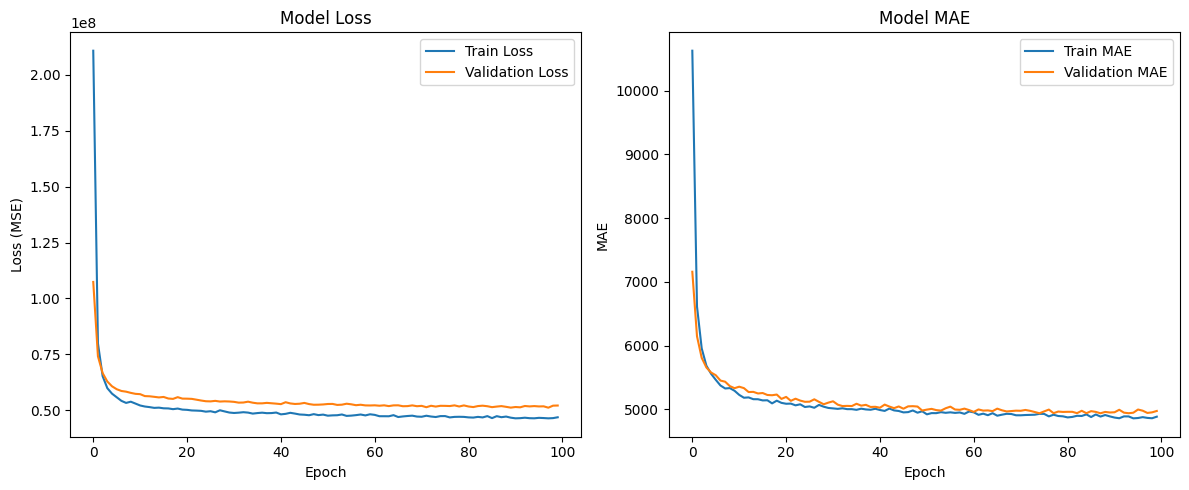

In [28]:
#Build and Train ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Linear output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, verbose=1)

# Plot training history (loss and MAE)
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Mean Absolute Error (MAE): 4976.42
Mean Squared Error (MSE): 52096092.00
R-squared (R²): 0.49


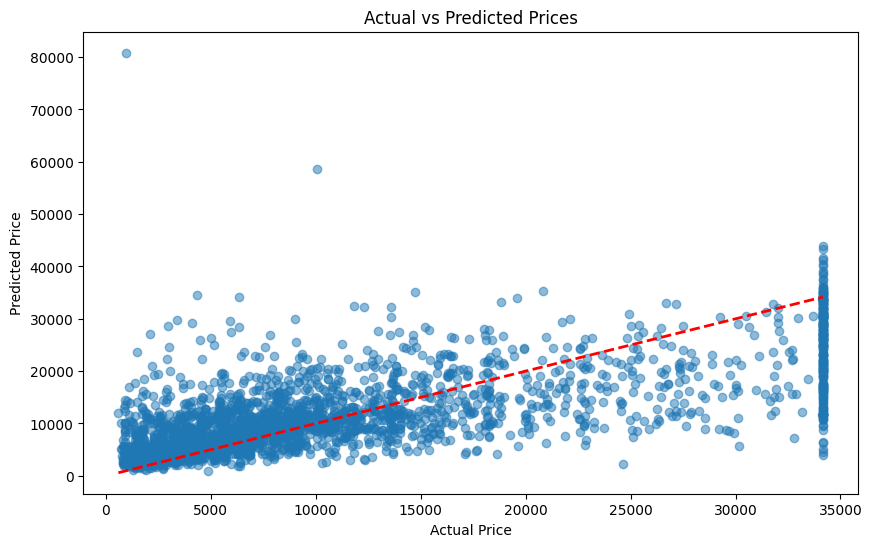

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

**4: Accuracy Improvement**

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 4976.42
Mean Squared Error (MSE): 52096092.00
R-squared (R²): 0.49


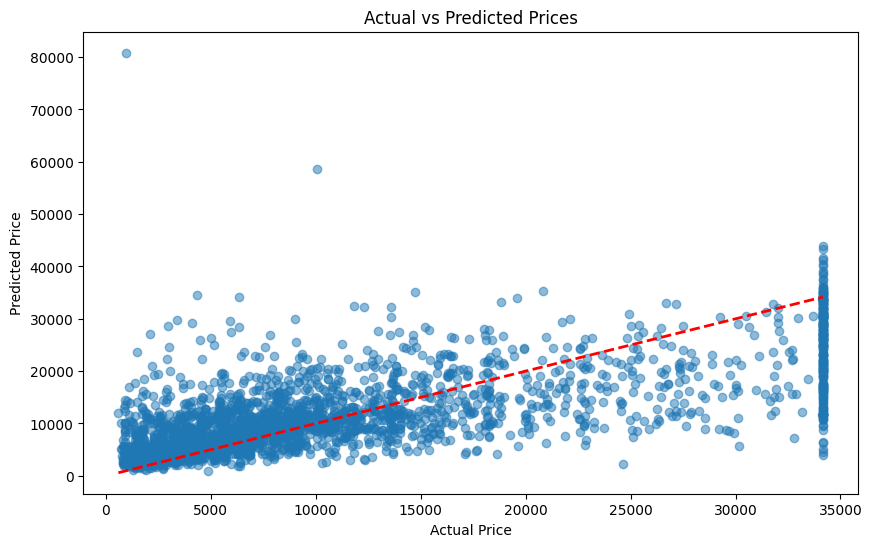

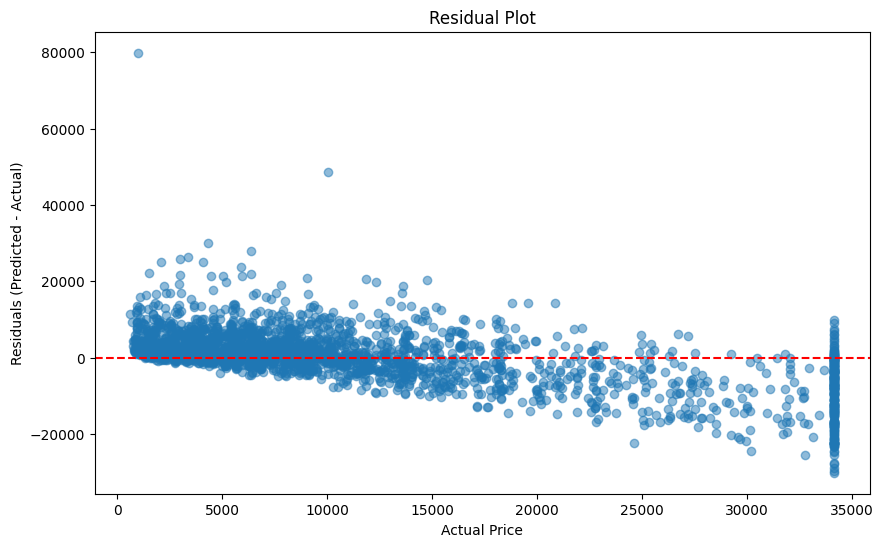

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test set (using model from Step 3)
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Plot residual plot
residuals = y_pred.flatten() - y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals (Predicted - Actual)')
plt.show()

In [33]:
# Install keras-tuner
!pip install keras-tuner

import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    # Input layer
    model.add(Dense(units=hp.Int('units1', min_value=16, max_value=128, step=16),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))

    # Additional hidden layers (1-3 more)
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
                        activation='relu'))
        model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(1, activation='linear'))

    # Compile model
    model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='mse', metrics=['mae'])
    return model

# Initialize Keras Tuner
tuner = kt.Hyperband(build_model, objective='val_loss', max_epochs=50,
                     factor=3, directory='tuner_dir', project_name='airbnb_price')

# Search for best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate best model on test set
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print best model metrics
print(f"Best Model MAE: {mae_best:.2f}")
print(f"Best Model MSE: {mse_best:.2f}")
print(f"Best Model R²: {r2_best:.2f}")

Trial 90 Complete [00h 01m 22s]
val_loss: 55783540.0

Best val_loss So Far: 46562200.0
Total elapsed time: 00h 34m 08s


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Best Model MAE: 4771.30
Best Model MSE: 46562200.00
Best Model R²: 0.54


In [34]:
from sklearn.model_selection import KFold

# Define k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []
r2_scores = []

# Cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Training Fold {fold + 1}...")
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model_cv = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])

    model_cv.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model_cv.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, verbose=0)

    y_pred_cv = model_cv.predict(X_val_cv, verbose=0)
    mae_scores.append(mean_absolute_error(y_val_cv, y_pred_cv))
    mse_scores.append(mean_squared_error(y_val_cv, y_pred_cv))
    r2_scores.append(r2_score(y_val_cv, y_pred_cv))

print(f"Cross-Validation MAE Scores: {[f'{x:.2f}' for x in mae_scores]}")
print(f"Average CV MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")
print(f"Cross-Validation MSE Scores: {[f'{x:.2f}' for x in mse_scores]}")
print(f"Average CV MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Cross-Validation R² Scores: {[f'{x:.2f}' for x in r2_scores]}")
print(f"Average CV R²: {np.mean(r2_scores):.2f} ± {np.std(r2_scores):.2f}")

Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fold 2...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fold 3...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fold 4...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fold 5...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-Validation MAE Scores: ['5011.62', '5081.32', '4955.20', '4914.03', '4943.97']
Average CV MAE: 4981.23 ± 59.20
Cross-Validation MSE Scores: ['52951336.00', '50213532.00', '45744488.00', '45929280.00', '48699500.00']
Average CV MSE: 48707627.20 ± 2712057.77
Cross-Validation R² Scores: ['0.48', '0.53', '0.56', '0.56', '0.54']
Average CV R²: 0.53 ± 0.03


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions from both models
y_pred_ann = best_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Combine predictions (50-50 weight)
y_pred_ensemble = 0.5 * y_pred_ann.flatten() + 0.5 * y_pred_rf

# Evaluate ensemble
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Print ensemble metrics
print(f"Ensemble MAE: {mae_ensemble:.2f}")
print(f"Ensemble MSE: {mse_ensemble:.2f}")
print(f"Ensemble R²: {r2_ensemble:.2f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Ensemble MAE: 4743.63
Ensemble MSE: 46154734.99
Ensemble R²: 0.55
